In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [ ]:
df = pd.read_csv("/content/BNB-USD (BaoCao).csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
1,2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2,2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
3,2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
4,2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335
...,...,...,...,...,...,...,...
1915,2024-05-28,603.526428,604.985107,593.716187,601.213257,601.213257,1852329404
1916,2024-05-29,601.213257,602.931519,592.966614,594.972046,594.972046,1642696946
1917,2024-05-30,594.972534,601.665039,586.557678,595.026794,595.026794,1737524745
1918,2024-05-31,595.026794,598.423645,589.774841,593.522339,593.522339,1590349553


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0        11.393217
1        11.869744
2        11.537903
3        11.545945
4        13.811967
           ...    
1915    601.213257
1916    594.972046
1917    595.026794
1918    593.522339
1919    601.304199
Name: Close, Length: 1920, dtype: float64

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [ ]:
train_data.shape

(1344, 1)

In [ ]:
test_data.shape

(576, 1)

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 2s 21ms/step - loss: 0.0414
Epoch 2/100
20/20 [==============================] - 0s 20ms/step - loss: 0.0025
Epoch 3/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0019
Epoch 4/100
20/20 [==============================] - 0s 19ms/step - loss: 0.0017
Epoch 5/100
20/20 [==============================] - 0s 20ms/step - loss: 0.0016
Epoch 6/100
20/20 [==============================] - 0s 20ms/step - loss: 0.0014
Epoch 7/100
20/20 [==============================] - 0s 22ms/step - loss: 0.0013
Epoch 8/100
20/20 [==============================] - 0s 21ms/step - loss: 0.0012
Epoch 9/100
20/20 [==============================] - 0s 19ms/step - loss: 0.0012
Epoch 10/100
20/20 [==============================] - 0s 20ms/step - loss: 0.0011
Epoch 11/100
20/20 [==============================] - 0s 20ms/step - loss: 0.0011
Epoch 12/100
20/20 [==============================] - 0s 19ms/step - loss: 0.0010
Epoch 13/100
20/20 [=====

In [ ]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 7ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [ ]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mse = np.mean((np.array(ytest) - np.array(y_pred))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 350.74269354683605
Testing MAPE: 76701.48222595672
Testing MSE: 123020.43707648973


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54920325 0.55884414 0.56906318 0.58871229 0.57873439 0.60991559
 0.58591298 0.59796771 0.60273301 0.60782863 0.61481403 0.57823327
 0.62978711 0.69924355 0.71845946 0.72066216 0.78041459 0.77042396
 0.79315809 0.93227844 0.89089661 0.93564248 0.85155461 0.84301543
 0.81820905 0.74694881 0.82142588 0.81624461 0.8140389  0.81419041
 0.83837673 0.86754205 0.85662036 0.84815731 0.8613035  0.90540851
 0.88793645 0.89677975 0.85098648 0.81239233 0.82940903 0.86456128
 0.85484399 0.86534962 0.86255113 0.86675161 0.85764064 0.90154532
 0.89375583 0.88097825 0.81782285 0.83721153 0.81568373 0.79310349
 0.78798066 0.81462955 0.81870755 0.84282773 0.85582406 0.89477894
 0.8966777  0.89854696 0.9074302  0.88296733 0.8799883  0.88651788
 0.87565198 0.85412527 0.82849135 0.82716841 0.86691594 0.86516916
 0.87461512 0.86911543 0.85262169 0.86869745 0.88045575 0.86483242
 0.87444629 0.87804328 0.8738145  0.83644398 0.8595077  0.84017087
 0.85816297 0.85711658 0.84833749 0.88733608 0.914

In [ ]:
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1


0 day input [0.54920325 0.55884414 0.56906318 0.58871229 0.57873439 0.60991559
 0.58591298 0.59796771 0.60273301 0.60782863 0.61481403 0.57823327
 0.62978711 0.69924355 0.71845946 0.72066216 0.78041459 0.77042396
 0.79315809 0.93227844 0.89089661 0.93564248 0.85155461 0.84301543
 0.81820905 0.74694881 0.82142588 0.81624461 0.8140389  0.81419041
 0.83837673 0.86754205 0.85662036 0.84815731 0.8613035  0.90540851
 0.88793645 0.89677975 0.85098648 0.81239233 0.82940903 0.86456128
 0.85484399 0.86534962 0.86255113 0.86675161 0.85764064 0.90154532
 0.89375583 0.88097825 0.81782285 0.83721153 0.81568373 0.79310349
 0.78798066 0.81462955 0.81870755 0.84282773 0.85582406 0.89477894
 0.8966777  0.89854696 0.9074302  0.88296733 0.8799883  0.88651788
 0.87565198 0.85412527 0.82849135 0.82716841 0.86691594 0.86516916
 0.87461512 0.86911543 0.85262169 0.86869745 0.88045575 0.86483242
 0.87444629 0.87804328 0.8738145  0.83644398 0.8595077  0.84017087
 0.85816297 0.85711658 0.84833749 0.88733608 0.914

In [ ]:
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.54920325 0.55884414 0.56906318 0.58871229 0.57873439 0.60991559
 0.58591298 0.59796771 0.60273301 0.60782863 0.61481403 0.57823327
 0.62978711 0.69924355 0.71845946 0.72066216 0.78041459 0.77042396
 0.79315809 0.93227844 0.89089661 0.93564248 0.85155461 0.84301543
 0.81820905 0.74694881 0.82142588 0.81624461 0.8140389  0.81419041
 0.83837673 0.86754205 0.85662036 0.84815731 0.8613035  0.90540851
 0.88793645 0.89677975 0.85098648 0.81239233 0.82940903 0.86456128
 0.85484399 0.86534962 0.86255113 0.86675161 0.85764064 0.90154532
 0.89375583 0.88097825 0.81782285 0.83721153 0.81568373 0.79310349
 0.78798066 0.81462955 0.81870755 0.84282773 0.85582406 0.89477894
 0.8966777  0.89854696 0.9074302  0.88296733 0.8799883  0.88651788
 0.87565198 0.85412527 0.82849135 0.82716841 0.86691594 0.86516916
 0.87461512 0.86911543 0.85262169 0.86869745 0.88045575 0.86483242
 0.87444629 0.87804328 0.8738145  0.83644398 0.8595077  0.84017087
 0.85816297 0.85711658 0.84833749 0.88733608 0.914

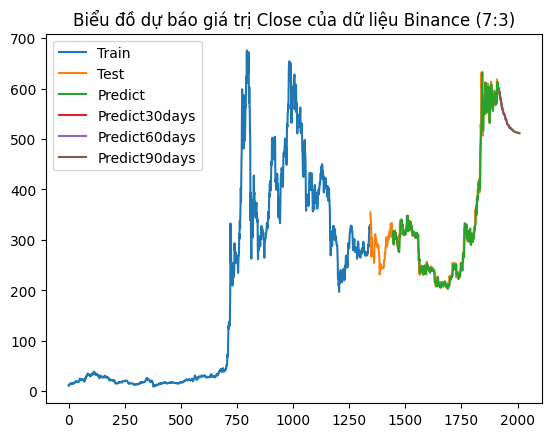

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Binance (7:3)")
plt.show()

In [ ]:
train_size_82 = int(0.8 * len(df1))
test_size_82 = len(df1) - train_size_82
train_data_82 = df1[:train_size_82]
test_data_82 = df1[train_size_82:train_size_82+test_size_82]

In [ ]:
X_train_82, y_train_82 = create_dataset(train_data_82, time_step)
X_test_82, ytest_82 = create_dataset(test_data_82, time_step)

In [ ]:
X_train_82 =X_train_82.reshape(X_train_82.shape[0],X_train_82.shape[1] , 1)
X_test_82 = X_test_82.reshape(X_test_82.shape[0],X_test_82.shape[1] , 1)

In [ ]:
model.fit(X_train_82,y_train_82,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 0s 20ms/step - loss: 4.5963e-04
Epoch 2/100
23/23 [==============================] - 0s 19ms/step - loss: 4.6722e-04
Epoch 3/100
23/23 [==============================] - 0s 20ms/step - loss: 4.7905e-04
Epoch 4/100
23/23 [==============================] - 0s 19ms/step - loss: 4.5777e-04
Epoch 5/100
23/23 [==============================] - 0s 19ms/step - loss: 4.3556e-04
Epoch 6/100
23/23 [==============================] - 0s 20ms/step - loss: 4.4965e-04
Epoch 7/100
23/23 [==============================] - 0s 19ms/step - loss: 4.4435e-04
Epoch 8/100
23/23 [==============================] - 0s 20ms/step - loss: 4.5790e-04
Epoch 9/100
23/23 [==============================] - 0s 19ms/step - loss: 5.8857e-04
Epoch 10/100
23/23 [==============================] - 0s 20ms/step - loss: 5.2131e-04
Epoch 11/100
23/23 [==============================] - 0s 19ms/step - loss: 4.4553e-04
Epoch 12/100
23/23 [==============================] - 0s 19ms/s

In [ ]:
train_predict_82=model.predict(X_train_82)
y_pred_82=model.predict(X_test_82)

9/9 [==============================] - 0s 7ms/step


In [ ]:
train_predict_82=scaler.inverse_transform(train_predict_82)
y_pred_82=scaler.inverse_transform(y_pred_82)

In [ ]:
test_82_rmse = np.sqrt(np.mean((y_pred_82 - ytest_82)**2))
test_82_mape = np.mean(np.abs((ytest_82 - y_pred_82) / ytest_82)) * 100
test_82_mse = np.mean((np.array(ytest_82) - np.array(y_pred_82))**2)
print('Testing RMSE:', test_82_rmse)
print('Testing MAPE:', test_82_mape)
print('Testing MSE:', test_82_mse)

Testing RMSE: 382.15762957099236
Testing MAPE: 79087.01089034023
Testing MSE: 146044.45383931982


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54920325 0.55884414 0.56906318 0.58871229 0.57873439 0.60991559
 0.58591298 0.59796771 0.60273301 0.60782863 0.61481403 0.57823327
 0.62978711 0.69924355 0.71845946 0.72066216 0.78041459 0.77042396
 0.79315809 0.93227844 0.89089661 0.93564248 0.85155461 0.84301543
 0.81820905 0.74694881 0.82142588 0.81624461 0.8140389  0.81419041
 0.83837673 0.86754205 0.85662036 0.84815731 0.8613035  0.90540851
 0.88793645 0.89677975 0.85098648 0.81239233 0.82940903 0.86456128
 0.85484399 0.86534962 0.86255113 0.86675161 0.85764064 0.90154532
 0.89375583 0.88097825 0.81782285 0.83721153 0.81568373 0.79310349
 0.78798066 0.81462955 0.81870755 0.84282773 0.85582406 0.89477894
 0.8966777  0.89854696 0.9074302  0.88296733 0.8799883  0.88651788
 0.87565198 0.85412527 0.82849135 0.82716841 0.86691594 0.86516916
 0.87461512 0.86911543 0.85262169 0.86869745 0.88045575 0.86483242
 0.87444629 0.87804328 0.8738145  0.83644398 0.8595077  0.84017087
 0.85816297 0.85711658 0.84833749 0.88733608 0.914

In [ ]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.54920325 0.55884414 0.56906318 0.58871229 0.57873439 0.60991559
 0.58591298 0.59796771 0.60273301 0.60782863 0.61481403 0.57823327
 0.62978711 0.69924355 0.71845946 0.72066216 0.78041459 0.77042396
 0.79315809 0.93227844 0.89089661 0.93564248 0.85155461 0.84301543
 0.81820905 0.74694881 0.82142588 0.81624461 0.8140389  0.81419041
 0.83837673 0.86754205 0.85662036 0.84815731 0.8613035  0.90540851
 0.88793645 0.89677975 0.85098648 0.81239233 0.82940903 0.86456128
 0.85484399 0.86534962 0.86255113 0.86675161 0.85764064 0.90154532
 0.89375583 0.88097825 0.81782285 0.83721153 0.81568373 0.79310349
 0.78798066 0.81462955 0.81870755 0.84282773 0.85582406 0.89477894
 0.8966777  0.89854696 0.9074302  0.88296733 0.8799883  0.88651788
 0.87565198 0.85412527 0.82849135 0.82716841 0.86691594 0.86516916
 0.87461512 0.86911543 0.85262169 0.86869745 0.88045575 0.86483242
 0.87444629 0.87804328 0.8738145  0.83644398 0.8595077  0.84017087
 0.85816297 0.85711658 0.84833749 0.88733608 0.914

In [ ]:
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.54920325 0.55884414 0.56906318 0.58871229 0.57873439 0.60991559
 0.58591298 0.59796771 0.60273301 0.60782863 0.61481403 0.57823327
 0.62978711 0.69924355 0.71845946 0.72066216 0.78041459 0.77042396
 0.79315809 0.93227844 0.89089661 0.93564248 0.85155461 0.84301543
 0.81820905 0.74694881 0.82142588 0.81624461 0.8140389  0.81419041
 0.83837673 0.86754205 0.85662036 0.84815731 0.8613035  0.90540851
 0.88793645 0.89677975 0.85098648 0.81239233 0.82940903 0.86456128
 0.85484399 0.86534962 0.86255113 0.86675161 0.85764064 0.90154532
 0.89375583 0.88097825 0.81782285 0.83721153 0.81568373 0.79310349
 0.78798066 0.81462955 0.81870755 0.84282773 0.85582406 0.89477894
 0.8966777  0.89854696 0.9074302  0.88296733 0.8799883  0.88651788
 0.87565198 0.85412527 0.82849135 0.82716841 0.86691594 0.86516916
 0.87461512 0.86911543 0.85262169 0.86869745 0.88045575 0.86483242
 0.87444629 0.87804328 0.8738145  0.83644398 0.8595077  0.84017087
 0.85816297 0.85711658 0.84833749 0.88733608 0.914

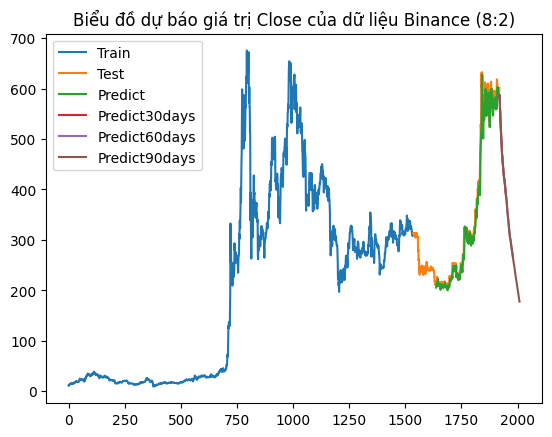

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_82, step=1)
plt.plot(scaler.inverse_transform(train_data_82))
test_data_index = pd.RangeIndex(start=train_size_82, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_82))
test_data_index = pd.RangeIndex(start=train_size_82+101, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,(y_pred_82))
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
prediect_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_60))
prediect_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Binance (8:2)")
plt.show()

In [ ]:
train_size_91 = int(0.9 * len(df1))
test_size_91 = len(df1) - train_size_91
train_data_91 = df1[:train_size_91]
test_data_91 = df1[train_size_91:train_size_91+test_size_91]

In [ ]:
X_train_91, y_train_91 = create_dataset(train_data_91, time_step)
X_test_91, ytest_91 = create_dataset(test_data_91, time_step)

In [ ]:
X_train_91 =X_train_91.reshape(X_train_91.shape[0],X_train_91.shape[1] , 1)
X_test_91 = X_test_91.reshape(X_test_91.shape[0],X_test_91.shape[1] , 1)

In [ ]:
model.fit(X_train_91,y_train_91,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 1s 35ms/step - loss: 3.9435e-04
Epoch 2/100
26/26 [==============================] - 1s 20ms/step - loss: 4.0224e-04
Epoch 3/100
26/26 [==============================] - 0s 18ms/step - loss: 4.0046e-04
Epoch 4/100
26/26 [==============================] - 0s 19ms/step - loss: 3.8906e-04
Epoch 5/100
26/26 [==============================] - 1s 34ms/step - loss: 3.9433e-04
Epoch 6/100
26/26 [==============================] - 1s 33ms/step - loss: 4.1123e-04
Epoch 7/100
26/26 [==============================] - 1s 34ms/step - loss: 4.0970e-04
Epoch 8/100
26/26 [==============================] - 1s 35ms/step - loss: 3.8828e-04
Epoch 9/100
26/26 [==============================] - 1s 30ms/step - loss: 3.8232e-04
Epoch 10/100
26/26 [==============================] - 1s 19ms/step - loss: 3.7916e-04
Epoch 11/100
26/26 [==============================] - 1s 19ms/step - loss: 3.9537e-04
Epoch 12/100
26/26 [==============================] - 0s 19ms/s

In [ ]:
train_predict_91=model.predict(X_train_91)
y_pred_91=model.predict(X_test_91)

3/3 [==============================] - 0s 13ms/step


In [ ]:
train_predict_91=scaler.inverse_transform(train_predict_91)
y_pred_91=scaler.inverse_transform(y_pred_91)

In [ ]:
test_91_rmse = np.sqrt(np.mean((y_pred_91 - ytest_91)**2))
test_91_mape = np.mean(np.abs((ytest_91 - y_pred_91) / ytest_91)) * 100
test_91_mse = np.mean((np.array(ytest_91) - np.array(y_pred_91))**2)
print('Testing RMSE:', test_91_rmse)
print('Testing MAPE:', test_91_mape)
print('Testing MSE:', test_91_mse)

Testing RMSE: 563.6179701707488
Testing MAPE: 67427.89196491176
Testing MSE: 317665.216299395


In [ ]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54920325 0.55884414 0.56906318 0.58871229 0.57873439 0.60991559
 0.58591298 0.59796771 0.60273301 0.60782863 0.61481403 0.57823327
 0.62978711 0.69924355 0.71845946 0.72066216 0.78041459 0.77042396
 0.79315809 0.93227844 0.89089661 0.93564248 0.85155461 0.84301543
 0.81820905 0.74694881 0.82142588 0.81624461 0.8140389  0.81419041
 0.83837673 0.86754205 0.85662036 0.84815731 0.8613035  0.90540851
 0.88793645 0.89677975 0.85098648 0.81239233 0.82940903 0.86456128
 0.85484399 0.86534962 0.86255113 0.86675161 0.85764064 0.90154532
 0.89375583 0.88097825 0.81782285 0.83721153 0.81568373 0.79310349
 0.78798066 0.81462955 0.81870755 0.84282773 0.85582406 0.89477894
 0.8966777  0.89854696 0.9074302  0.88296733 0.8799883  0.88651788
 0.87565198 0.85412527 0.82849135 0.82716841 0.86691594 0.86516916
 0.87461512 0.86911543 0.85262169 0.86869745 0.88045575 0.86483242
 0.87444629 0.87804328 0.8738145  0.83644398 0.8595077  0.84017087
 0.85816297 0.85711658 0.84833749 0.88733608 0.914

In [ ]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

0 day input [0.54920325 0.55884414 0.56906318 0.58871229 0.57873439 0.60991559
 0.58591298 0.59796771 0.60273301 0.60782863 0.61481403 0.57823327
 0.62978711 0.69924355 0.71845946 0.72066216 0.78041459 0.77042396
 0.79315809 0.93227844 0.89089661 0.93564248 0.85155461 0.84301543
 0.81820905 0.74694881 0.82142588 0.81624461 0.8140389  0.81419041
 0.83837673 0.86754205 0.85662036 0.84815731 0.8613035  0.90540851
 0.88793645 0.89677975 0.85098648 0.81239233 0.82940903 0.86456128
 0.85484399 0.86534962 0.86255113 0.86675161 0.85764064 0.90154532
 0.89375583 0.88097825 0.81782285 0.83721153 0.81568373 0.79310349
 0.78798066 0.81462955 0.81870755 0.84282773 0.85582406 0.89477894
 0.8966777  0.89854696 0.9074302  0.88296733 0.8799883  0.88651788
 0.87565198 0.85412527 0.82849135 0.82716841 0.86691594 0.86516916
 0.87461512 0.86911543 0.85262169 0.86869745 0.88045575 0.86483242
 0.87444629 0.87804328 0.8738145  0.83644398 0.8595077  0.84017087
 0.85816297 0.85711658 0.84833749 0.88733608 0.914

In [ ]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

0 day input [0.54920325 0.55884414 0.56906318 0.58871229 0.57873439 0.60991559
 0.58591298 0.59796771 0.60273301 0.60782863 0.61481403 0.57823327
 0.62978711 0.69924355 0.71845946 0.72066216 0.78041459 0.77042396
 0.79315809 0.93227844 0.89089661 0.93564248 0.85155461 0.84301543
 0.81820905 0.74694881 0.82142588 0.81624461 0.8140389  0.81419041
 0.83837673 0.86754205 0.85662036 0.84815731 0.8613035  0.90540851
 0.88793645 0.89677975 0.85098648 0.81239233 0.82940903 0.86456128
 0.85484399 0.86534962 0.86255113 0.86675161 0.85764064 0.90154532
 0.89375583 0.88097825 0.81782285 0.83721153 0.81568373 0.79310349
 0.78798066 0.81462955 0.81870755 0.84282773 0.85582406 0.89477894
 0.8966777  0.89854696 0.9074302  0.88296733 0.8799883  0.88651788
 0.87565198 0.85412527 0.82849135 0.82716841 0.86691594 0.86516916
 0.87461512 0.86911543 0.85262169 0.86869745 0.88045575 0.86483242
 0.87444629 0.87804328 0.8738145  0.83644398 0.8595077  0.84017087
 0.85816297 0.85711658 0.84833749 0.88733608 0.914

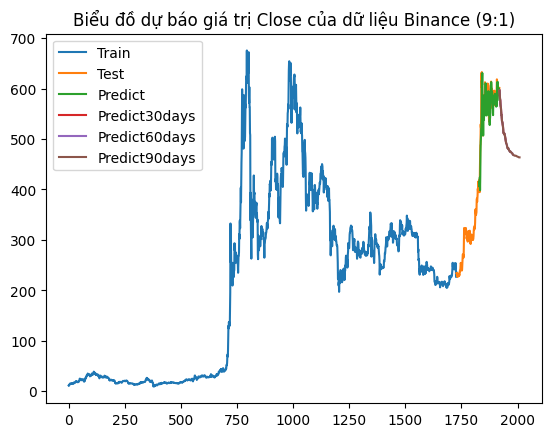

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_91, step=1)
plt.plot(scaler.inverse_transform(train_data_91))
test_data_index = pd.RangeIndex(start=train_size_91, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_91))
test_data_index = pd.RangeIndex(start=train_size_91+101, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,(y_pred_91))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
predict_data_index_60 = pd.RangeIndex(start=len(df1), stop=len(df1)+60, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60))
predict_data_index_90 = pd.RangeIndex(start=len(df1), stop=len(df1)+90, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu Binance (9:1)")
plt.show()